In [1]:
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
ticker = "SPY"

t = yf.Ticker(ticker)

In [3]:
start = datetime(2021, 1, 1)
end = datetime(2025, 6, 1)

factor = 3

In [4]:
df = yf.download(ticker, start, end)

/tmp/ipykernel_7530/99250952.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2021-01-04,344.256744,350.473700,340.550842,350.343000,110210800
2021-01-05,346.627747,347.719926,343.565945,343.612636,66426200
2021-01-06,348.700043,351.901888,344.564750,345.115497,107997700
2021-01-07,353.880890,354.627660,350.903098,351.080461,68766800
2021-01-08,355.897278,356.111959,352.014012,355.271836,71677200


In [6]:
df["returns"] = df["Close"].pct_change()

In [7]:
df.head()

Price,Close,High,Low,Open,Volume,returns
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
2021-01-04,344.256744,350.473700,340.550842,350.343000,110210800,NaN
2021-01-05,346.627747,347.719926,343.565945,343.612636,66426200,0.006887
2021-01-06,348.700043,351.901888,344.564750,345.115497,107997700,0.005978
2021-01-07,353.880890,354.627660,350.903098,351.080461,68766800,0.014858
2021-01-08,355.897278,356.111959,352.014012,355.271836,71677200,0.005698


In [8]:
import numpy as np

In [9]:
df["log_letf_factor"] = np.log(1 + df["returns"] * factor)

In [10]:
df["log_ordinary_factor"] = np.log(1 + df["returns"])
df.drop(columns=["log_ordinary_factor"])

Price,Close,High,Low,Open,Volume,returns,log_letf_factor
Ticker,SPY,SPY,SPY,SPY,SPY,,
Date,,,,,,,
2021-01-04,344.256744,350.473700,340.550842,350.343000,110210800,NaN,NaN
2021-01-05,346.627747,347.719926,343.565945,343.612636,66426200,0.006887,0.020451
2021-01-06,348.700043,351.901888,344.564750,345.115497,107997700,0.005978,0.017776
2021-01-07,353.880890,354.627660,350.903098,351.080461,68766800,0.014858,0.043608
2021-01-08,355.897278,356.111959,352.014012,355.271836,71677200,0.005698,0.016949
...,...,...,...,...,...,...,...
2025-05-23,574.110168,576.786870,570.630463,571.007187,76029000,-0.006826,-0.020690
2025-05-27,586.046326,586.204918,573.436112,581.010167,72588500,0.020791,0.060504


In [11]:
df.head()

Price,Close,High,Low,Open,Volume,returns,log_letf_factor,log_ordinary_factor
Ticker,SPY,SPY,SPY,SPY,SPY,,,
Date,,,,,,,,
2021-01-04,344.256744,350.473700,340.550842,350.343000,110210800,NaN,NaN,NaN
2021-01-05,346.627747,347.719926,343.565945,343.612636,66426200,0.006887,0.020451,0.006864
2021-01-06,348.700043,351.901888,344.564750,345.115497,107997700,0.005978,0.017776,0.005961
2021-01-07,353.880890,354.627660,350.903098,351.080461,68766800,0.014858,0.043608,0.014748
2021-01-08,355.897278,356.111959,352.014012,355.271836,71677200,0.005698,0.016949,0.005682


In [12]:
window_length = 10
window_start = datetime(2022, 3, 1)

# putting $100 into underlying

start_idx = 0
end_idx = start_idx + window_length

# ordinary pct return ending on that day
df["ordinary_pct_return"] = 100 * df["Close"] / df["Close"].shift(window_length)

# ordinary_pct_change = 100*(df['Close'].iloc[end_idx]/df['Close'].iloc[start_idx])

df["leveraged_pct_change"] = 100 * np.exp(
    df["log_letf_factor"].rolling(window=window_length).sum()
)

# leveraged_pct_change = 100*(np.exp(np.sum(df['log_letf_factor'].iloc[start_idx + 1: end_idx + 1])))

In [13]:
df

Price,Close,High,Low,Open,Volume,returns,log_letf_factor,log_ordinary_factor,ordinary_pct_return,leveraged_pct_change
Ticker,SPY,SPY,SPY,SPY,SPY,,,,,
Date,,,,,,,,,,
2021-01-04,344.256744,350.473700,340.550842,350.343000,110210800,NaN,NaN,NaN,NaN,NaN
2021-01-05,346.627747,347.719926,343.565945,343.612636,66426200,0.006887,0.020451,0.006864,NaN,NaN
2021-01-06,348.700043,351.901888,344.564750,345.115497,107997700,0.005978,0.017776,0.005961,NaN,NaN
2021-01-07,353.880890,354.627660,350.903098,351.080461,68766800,0.014858,0.043608,0.014748,NaN,NaN
2021-01-08,355.897278,356.111959,352.014012,355.271836,71677200,0.005698,0.016949,0.005682,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,574.110168,576.786870,570.630463,571.007187,76029000,-0.006826,-0.020690,-0.006849,102.617201,107.584040
2025-05-27,586.046326,586.204918,573.436112,581.010167,72588500,0.020791,0.060504,0.020578,101.399689,103.984986


In [14]:
df.dropna(inplace=True)

In [15]:
df

Price,Close,High,Low,Open,Volume,returns,log_letf_factor,log_ordinary_factor,ordinary_pct_return,leveraged_pct_change
Ticker,SPY,SPY,SPY,SPY,SPY,,,,,
Date,,,,,,,,,,
2021-01-19,353.460876,354.002309,351.687277,353.171501,51233300,0.007852,0.023283,0.007822,102.673624,108.072869
2021-01-20,358.352264,359.192387,355.365129,355.757173,61836100,0.013839,0.040677,0.013744,103.382452,110.280969
2021-01-21,358.678955,359.341744,357.754823,358.912324,47840100,0.000912,0.002731,0.000911,102.861747,108.634189
2021-01-22,357.409424,358.576269,356.438600,356.821329,52860500,-0.003539,-0.010675,-0.003546,100.997096,102.894377
2021-01-25,358.818970,359.173667,353.283434,358.146866,70402000,0.003944,0.011762,0.003936,100.820937,102.362003
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,574.110168,576.786870,570.630463,571.007187,76029000,-0.006826,-0.020690,-0.006849,102.617201,107.584040
2025-05-27,586.046326,586.204918,573.436112,581.010167,72588500,0.020791,0.060504,0.020578,101.399689,103.984986


In [16]:
df["difference"] = df["leveraged_pct_change"] - df["ordinary_pct_return"]

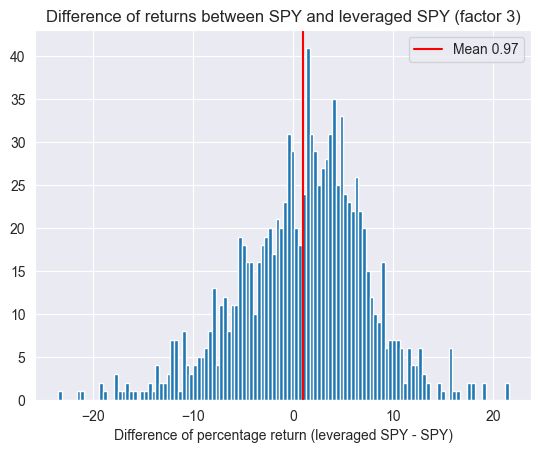

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

plt.figure()
plt.title(
    f"Difference of returns between {ticker} and leveraged {ticker} (factor {factor})"
)
plt.xlabel(f"Difference of percentage return (leveraged {ticker} - {ticker})")
mean = df["difference"].mean()
plt.axvline(x=mean, label=f"Mean {mean:.2f}", color="red")
plt.hist(df["difference"], bins=120)

plt.legend()
plt.show()

In [18]:
df["difference"].quantile(0.05)

np.float64(-10.66533422956321)

In [19]:
np.exp(np.sum(df["log_letf_factor"].iloc[start_idx + 1 : end_idx + 1]))

np.float64(1.0176174694932256)

In [20]:
import pandas as pd


def compare_leveraged(series, window_size, factor):
    # df = yf.download(ticker, start_date, end_date)

    df = pd.DataFrame()
    df["returns"] = series.pct_change()

    df["ord_log_returns"] = np.log(1 + df["returns"])
    df["lev_log_returns"] = np.log(1 + df["returns"] * factor)

    # ordinary pct return ending on that day
    df["ord_pct_returns"] = 100 * series / series.shift(window_size)

    # ordinary_pct_change = 100*(df['Close'].iloc[end_idx]/df['Close'].iloc[start_idx])

    df["lev_pct_returns"] = 100 * np.exp(
        df["lev_log_returns"].rolling(window=window_size).sum()
    ).fillna(0)
    # df["lev_pct_returns"].fillna(0, inplace=True)

    difference = df["lev_pct_returns"] - df["ord_pct_returns"]
    difference.dropna(inplace=True)

    df.drop(
        columns=[
            "returns",
            "ord_log_returns",
            "lev_log_returns",
            "ord_pct_returns",
            "lev_pct_returns",
        ]
    )

    return difference

In [21]:
def plot_comparison(series, window_sizes=[1, 5, 10, 21], factors=[2, 3, 5]):
    plt.figure()

    for window_size in window_sizes:
        for factor in factors:
            difference = compare_leveraged(data, window_size, factor)
            plt.hist(
                difference,
                bins=100,
                alpha=0.5,
                label=f"size = {window_size} \nfactor = {factor} \nmedian = {difference.median():.2f} \nmean = {difference.mean():.2f} \nstd = {difference.std():.2f}",
            )

    plt.xlabel(f"Difference of lETF - asset percentage returns")
    plt.legend()
    plt.show()

/tmp/ipykernel_7530/1831024621.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("F", start, end)["Close"]
[*********************100%***********************]  1 of 1 completed


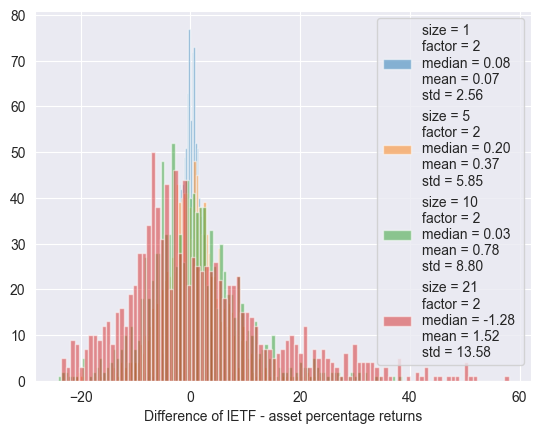

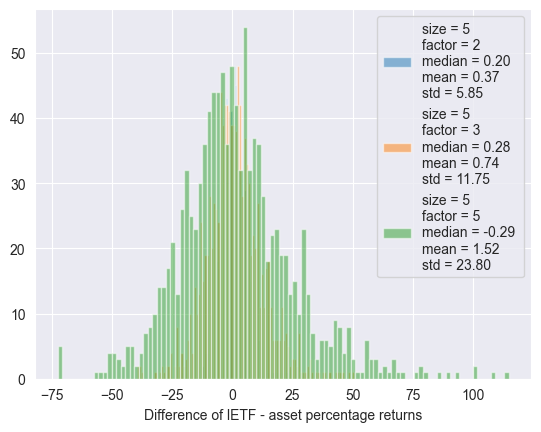

In [22]:
data = yf.download("F", start, end)["Close"]
plot_comparison(data, factors=[2])
plot_comparison(data, window_sizes=[5])

simulating movement GBM

In [23]:
import numpy as np

In [ ]:
def simulate_gbm(S0, mu, sigma, T, N, n_paths):
    # simulate n_paths many paths from 0 to T of GBM with parameters mu and sigma
    dt = T / N
    times = np.linspace(0, T, N + 1)

    Z = np.random.randn(n_paths, N)

    drift = mu - (1 / 2) * (sigma**2) * dt
    diffusion = sigma * dt * Z, axis=1

    logS = np.zeros((n_paths, N + 1))
    logS[:, 0] = np.log(S0)
    logS[:, 1:] = np.cumsum(drift + diffusion, axis=1) + logS[:, :1]

    S = np.exp(logS)

    return S

In [34]:
S = simulate_gbm(100, 0.01, 0.02, 10, 100, 100)

In [26]:
import pandas as pd

In [35]:
df = pd.DataFrame(S)

In [36]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,100.0,100.829302,101.751794,102.548354,103.271145,104.260402,105.426234,106.409423,107.732821,108.894267,...,246.645909,248.246373,251.909123,254.104930,256.556123,258.795938,260.801172,263.018908,265.019943,267.560446
1,100.0,101.042683,102.259867,103.213416,104.145655,105.171636,106.115143,107.366317,108.599799,109.120401,...,251.554305,253.340543,256.589213,259.266807,262.109422,265.018000,268.566219,271.904196,275.405464,278.041165
2,100.0,101.232917,102.175417,103.405550,104.154106,105.033513,106.242527,106.957738,108.026788,109.216364,...,236.009337,237.701853,239.974354,242.569980,244.186161,246.523388,248.960791,251.438619,253.326552,256.249985
3,100.0,101.098323,102.350684,103.122631,104.539530,105.879629,106.749610,107.792727,108.705031,109.374209,...,247.508995,250.162885,251.455896,253.771554,257.087893,259.652683,262.274337,264.324178,266.942915,268.888761
4,100.0,101.314065,102.267072,103.580705,104.346305,105.384991,106.536306,107.776207,109.355606,110.594004,...,247.365262,250.455392,252.404850,255.965488,258.485113,261.067322,262.889717,264.316436,267.726912,269.866169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.0,101.123822,102.304944,103.315668,104.257498,105.380989,106.735458,107.919821,109.096994,110.194045,...,254.774500,256.677118,258.624234,260.780288,262.577931,265.424723,267.236129,270.091172,272.244568,275.142474
96,100.0,101.291111,102.286662,103.524481,104.359589,105.289504,106.329110,107.419941,108.628385,109.210678,...,257.287969,259.004927,262.071959,264.337708,267.276485,269.549651,272.862141,275.599929,279.041426,281.764919
97,100.0,101.459318,102.617134,103.634614,104.561947,105.904532,107.040049,108.086610,109.343989,110.547793,...,252.193076,254.438424,256.891510,260.126222,262.601584,265.574375,267.627343,270.266965,273.010021,275.547943
98,100.0,100.778934,101.683071,102.655190,103.746695,104.837696,105.923381,107.334240,108.634785,109.565512,...,240.634854,242.875905,245.248005,247.527052,250.333913,253.304885,255.619969,258.428454,259.720848,261.400855


now do the below but with the above S

In [31]:
# ordinary pct return ending on that day
df["ordinary_pct_return"] = 100 * df[100] / df[100].shift(window_length)

# ordinary_pct_change = 100*(df['Close'].iloc[end_idx]/df['Close'].iloc[start_idx])

df["leveraged_pct_change"] = 100 * np.exp(
    df["log_letf_factor"].rolling(window=window_length).sum()
)

# leveraged_pct_change = 100*(np.exp(np.sum(df['log_letf_factor'].iloc[start_idx + 1: end_idx + 1])))

KeyError: 'log_letf_factor'